# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Bluegills.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [2]
 [3]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [5]
 [4]
 [4]
 [4]
 [5]
 [2]
 [2]
 [4]
 [3]
 [4]
 [3]
 [4]
 [4]
 [4]
 [4]
 [3]
 [3]
 [3]
 [4]
 [4]
 [3]
 [4]
 [5]
 [4]
 [5]
 [4]
 [4]
 [3]
 [5]
 [5]
 [4]
 [5]
 [3]
 [4]
 [3]
 [4]
 [6]
 [4]
 [5]
 [4]
 [4]]


In [5]:
y = y.reshape(len(y), 1)

In [6]:
print(y)

[[ 67]
 [ 62]
 [109]
 [ 83]
 [ 91]
 [ 88]
 [137]
 [131]
 [122]
 [122]
 [118]
 [115]
 [131]
 [143]
 [142]
 [123]
 [122]
 [138]
 [135]
 [146]
 [146]
 [145]
 [145]
 [144]
 [140]
 [150]
 [152]
 [157]
 [155]
 [153]
 [154]
 [158]
 [162]
 [161]
 [162]
 [165]
 [171]
 [171]
 [162]
 [169]
 [167]
 [188]
 [100]
 [109]
 [150]
 [140]
 [170]
 [150]
 [140]
 [140]
 [150]
 [150]
 [140]
 [150]
 [150]
 [150]
 [160]
 [140]
 [150]
 [170]
 [150]
 [150]
 [150]
 [150]
 [150]
 [150]
 [160]
 [140]
 [160]
 [130]
 [160]
 [130]
 [170]
 [170]
 [160]
 [180]
 [160]
 [170]]


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [8]:
print(x)

[[-2.85245432]
 [-2.85245432]
 [-1.76713024]
 [-1.76713024]
 [-1.76713024]
 [-1.76713024]
 [-0.68180615]
 [-0.68180615]
 [-0.68180615]
 [-0.68180615]
 [-0.68180615]
 [-0.68180615]
 [-0.68180615]
 [-0.68180615]
 [-0.68180615]
 [-1.76713024]
 [-0.68180615]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 1.48884201]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 1.48884201]
 [-1.76713024]
 [-1.76713024]
 [ 0.40351793]
 [-0.68180615]
 [ 0.40351793]
 [-0.68180615]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [ 0.40351793]
 [-0.68180615]
 [-0.68180615]
 [-0.68180615]
 [ 0.40351793]
 [ 0.40351793]
 [-0.68180615]
 [ 0.40351793]
 [ 1.48884201]
 [ 0.40351793]
 [ 1.48884201]
 [ 0.40351793]
 [ 0.40351793]
 [-0.68180615]
 [ 1.48884201]
 [ 1.48884

In [9]:
print(y)

[[-3.19423869]
 [-3.40273293]
 [-1.44288707]
 [-2.52705712]
 [-2.19346633]
 [-2.31856288]
 [-0.27531932]
 [-0.52551241]
 [-0.90080204]
 [-0.90080204]
 [-1.06759743]
 [-1.19269398]
 [-0.52551241]
 [-0.02512623]
 [-0.06682508]
 [-0.85910319]
 [-0.90080204]
 [-0.23362047]
 [-0.35871701]
 [ 0.09997032]
 [ 0.09997032]
 [ 0.05827147]
 [ 0.05827147]
 [ 0.01657262]
 [-0.15022277]
 [ 0.26676571]
 [ 0.3501634 ]
 [ 0.55865765]
 [ 0.47525995]
 [ 0.39186225]
 [ 0.4335611 ]
 [ 0.60035649]
 [ 0.76715189]
 [ 0.72545304]
 [ 0.76715189]
 [ 0.89224843]
 [ 1.14244152]
 [ 1.14244152]
 [ 0.76715189]
 [ 1.05904382]
 [ 0.97564613]
 [ 1.85132194]
 [-1.8181767 ]
 [-1.44288707]
 [ 0.26676571]
 [-0.15022277]
 [ 1.10074267]
 [ 0.26676571]
 [-0.15022277]
 [-0.15022277]
 [ 0.26676571]
 [ 0.26676571]
 [-0.15022277]
 [ 0.26676571]
 [ 0.26676571]
 [ 0.26676571]
 [ 0.68375419]
 [-0.15022277]
 [ 0.26676571]
 [ 1.10074267]
 [ 0.26676571]
 [ 0.26676571]
 [ 0.26676571]
 [ 0.26676571]
 [ 0.26676571]
 [ 0.26676571]
 [ 0.68375

## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [11]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[4.5]])))

array([158.06693406])

## Visualising the SVR results

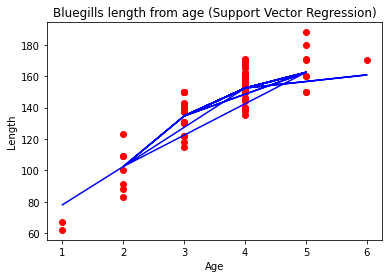

In [12]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color='blue')
plt.title('Bluegills length from age (Support Vector Regression)')
plt.xlabel('Age')
plt.ylabel('Length')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

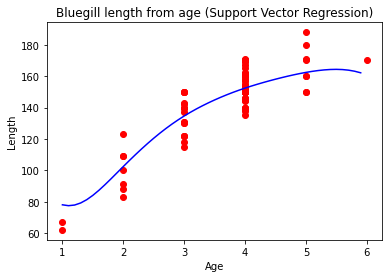

In [14]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red' ) 
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color='blue')
plt.title('Bluegill length from age (Support Vector Regression)')
plt.xlabel('Age')
plt.ylabel('Length')
plt.show()